Final Paper
Classification of Business and Leisure Travelers in Hotel Reviews: A Comparative Analysis Using TF-IDF with Logistic Regressionand Support Vector Machine
Xinyu Hou

### Introduction
In the domain of hospitality and customer satisfaction, understanding the distinct perspectives of diverse traveler groups is important for tailoring services to meet their specific needs. Leisure and business travelers often exhibit different preferences and expectations in their hotel experiences, which may be reflected in the language used within their reviews(Chu,R. & Choi T., 2000). This research aims to dig into these potential differences by leveraging the analytical power of Term Frequency-Inverse Document Frequency (TF-IDF) — a statistical measure used to evaluate the importance of a word in a corpus of documents. By examining the TF-IDF scores of words in hotel reviews, this study seeks to identify whether the two traveler categories, leisure and business, emphasize different aspects of their stay. This paper contributes to the understanding of consumer behavior in tourism through a nuanced analysis of textual data, providing a basis for improved service differentiation and marketing strategies.

This study delves into the distinct preferences and expectations of leisure and business travelers within the hotel industry by analyzing their reviews. While previous research has utilized Term Frequency-Inverse Document Frequency (TF-IDF) to explore various aspects of textual data, there remains a notable gap in specifically categorizing hotel reviews into business or leisure categories. Leveraging TF-IDF as an analytical tool, this research quantitatively examines the differences in language and thematic emphasis between these two traveler types. By analyzing TF-IDF scores from a corpus of hotel reviews, the study aims to identify key words and phrases significantly emphasized by each group, thereby underscoring distinct aspects valued by leisure versus business travelers. The findings are expected to provide actionable insights into how hotels can better cater to the diverging needs of these groups, thereby enhancing customer satisfaction and refining service offerings in the hospitality industry.

### Objectives
The **research question** that leads this study is: Do leisure travelers and business travelers focus on different aspects of their hotel experience, as evidenced by the differences in the TF-IDF scores of words in their reviews?

The **null hypothesis H0** is the distribution of words with high TF-IDF scores does not significantly differ between reviews left by leisure travelers and those left by business travelers, suggesting that these two groups focus on different aspects in their reviews.   

The **alternative hypothesis H1** is the distribution of words with high TF-IDF scores does significantly differ between reviews left by leisure travelers and those left by business travelers, suggesting that both groups focus on similar aspects in their reviews.

Addressing this research question not only enhances our comprehension of consumer behavior in the hospitality industry but also informs strategic enhancements in service offerings to cater effectively to each segment.


### Method
#### Dataset
The present study is based on a comprehensive Kaggle dataset extracted from Booking.com, containing 515,000 customer reviews associated with 1,493 luxury hotels across Europe(including UK) from 8/3/2015 to 8/2/2017. It serves as a rich resource for analyzing customer satisfaction and experience, as it includes not only textual reviews but also quantitative scores that capture the multifaceted nature of hotel stays. 

Each review includes comprehensive information such as the hotel’s location, the date of the review, the nationality of the reviewer, their travel purpose, stay duration, and the hotel’s geographical coordinates, allowing for a detailed analysis of trends and patterns in customer preferences. The dataset is structured to capture specific aspects of guests' experiences by requesting separate inputs for positive and negative feedback, thereby negating the need for additional sentiment analysis tools to segregate the reviews.

For each positive and negative review, it is also accompanied with respective word counts. Furthermore, it records the average score of the hotels, the total number of reviews received by the hotel, as well as the review history of each customer, offering a temporal dimension to the analysis. The inclusion of additional scoring by guests who opted not to leave a textual review adds another layer of data, adding the potential for a comprehensive evaluation of customer sentiment and priorities.

Kaggle Dataset Author:  
Jiashen Liu  
Dataset originally owned by booking.com  
https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe

#### Variables:  
**dependent variable**: the category of travel purpose for each review, either leisure or business 
**Independent Variable**: the features used to predict the dependent variable, which would be the frequency and distribution of specific words within the reviews using TF-IDF analysis.



### Package and Data loading

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [10]:
df = pd.read_csv('/Users/hollyhou/Downloads/bookingcom_hotel_review.csv',encoding = "ISO-8859-1")
df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


In [11]:
df.shape

(515738, 17)

### Data preparation
To analyze the differences between leisure and business travelers, we first needed to categorize our hotel reviews accordingly. A function, extract_travel_purpose, was written to label each review as 'leisure trip' or 'business trip' based on the 'tags' column in the dataset. Reviews without these specific tags were marked as 'other'.



In [5]:
# Define a function to extract "leisure trip" or "business trip" from the tag string
def extract_travel_purpose(tag_string):
    if "leisure trip" in tag_string.lower():
        return "leisure trip"
    elif "business trip" in tag_string.lower():
        return "business trip"
    else:
        return "other"  # or np.nan if you want to mark as missing values

# Apply this function to the 'Tags' column to create the new 'travel_purpose' column
df['travel_purpose'] = df['Tags'].apply(extract_travel_purpose)


Text(0.5, 1.0, 'Distribution of Travel Purpose')

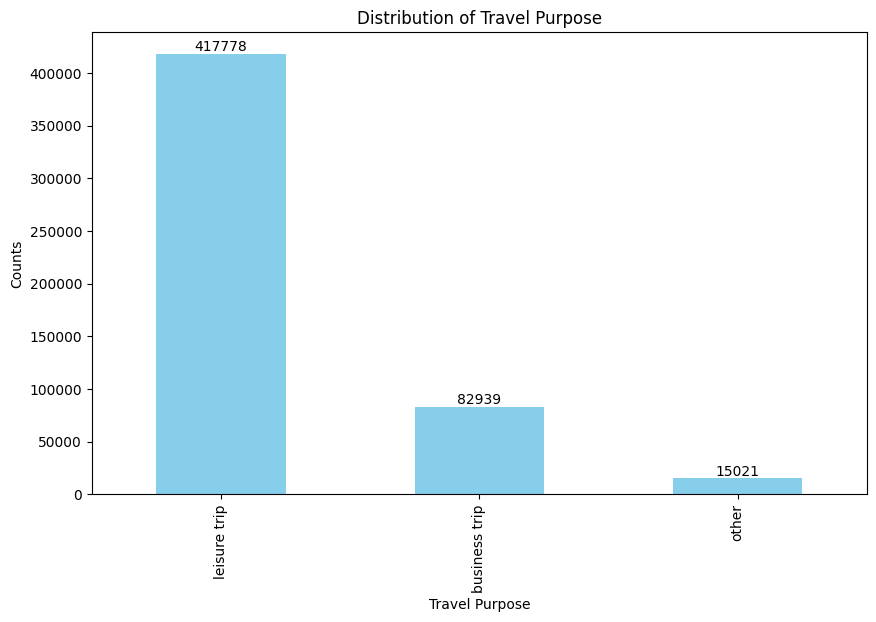

In [6]:
counts = df['travel_purpose'].value_counts()
ax = counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Add text labels above the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, str(i.get_height()), 
            ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Travel Purpose')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Travel Purpose')

For the integrity of our analysis, which is strictly related with the travel purpose, all entries labeled 'other' from origianl data were dropped. This step ensured that our dataset exclusively reflected the experiences and opinions of travelers with a clear purpose, either for leisure or business. In addition, the number of leisure trip and business trip is very imbalanced. The data should aviod imbalanced representation with the skew of seasonal travel trends that predominantly favor one type over the other. We chose to downsize the dataset to balance class distribution. Here we let the number of leisure trip maych business trip with random sampling.

In [7]:

# Separate the classes
df_leisure = df[df['travel_purpose'] == 'leisure trip']
df_business = df[df['travel_purpose'] == 'business trip']

# Count the instances
n_business = len(df_business)

# Randomly sample the leisure class to match the number of business instances
df_leisure_downsampled = df_leisure.sample(n=n_business, random_state=42) # Use a random state for reproducibility

# Combine the datasets
df_balanced = pd.concat([df_leisure_downsampled, df_business])

# Shuffle the dataset
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

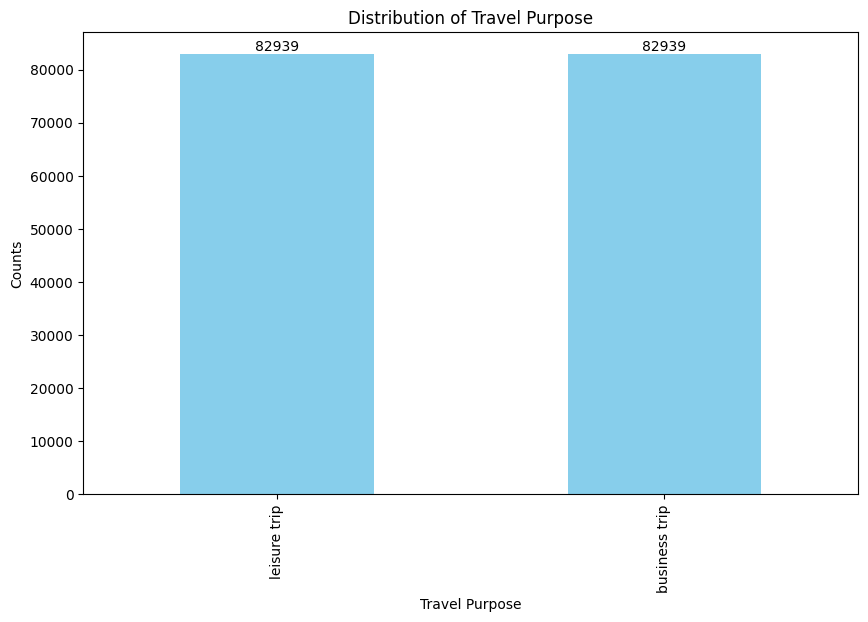

In [8]:
df = df[df['travel_purpose'] != 'other']

# Assuming df is your DataFrame and it has been filtered to exclude 'other'
# First, calculate the counts of each category in the 'travel_purpose' column
counts = df['travel_purpose'].value_counts()

# Plot the histogram/bar plot
ax = counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Add text labels above the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, str(i.get_height()), 
            ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Travel Purpose')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Travel Purpose')

# Show the plot
plt.show()

In [9]:
df['travel_purpose'].value_counts()
total_samples = 417778 + 82939
num_classes = 2

weight_leisure = total_samples / (num_classes * 417778)
weight_business = total_samples / (num_classes * 82939)

class_weight_dict = {
    'leisure trip': weight_leisure,
    'business trip': weight_business
}

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Additional_Number_of_Scoring,165878.0,496.139548,510.189123,1.000000,165.000000,337.000000,639.000000,2682.000000
Average_Score,165878.0,8.364417,0.563805,5.200000,8.100000,8.400000,8.800000,9.800000
Review_Total_Negative_Word_Counts,165878.0,18.586124,29.397738,0.000000,2.000000,9.000000,23.000000,408.000000
Total_Number_of_Reviews,165878.0,2713.063939,2309.305637,43.000000,1135.000000,2092.000000,3609.000000,16670.000000
Review_Total_Positive_Word_Counts,165878.0,16.328892,20.574447,0.000000,5.000000,10.000000,20.000000,395.000000
Total_Number_of_Reviews_Reviewer_Has_Given,165878.0,8.525308,13.312690,1.000000,1.000000,4.000000,10.000000,330.000000
Reviewer_Score,165878.0,8.233451,1.706415,2.500000,7.100000,8.800000,9.600000,10.000000
lat,164861.0,49.558869,3.317635,41.328376,48.235379,51.500961,51.516288,52.400181
lng,164861.0,2.828564,4.653693,-0.369758,-0.146083,-0.019428,4.831098,16.429233


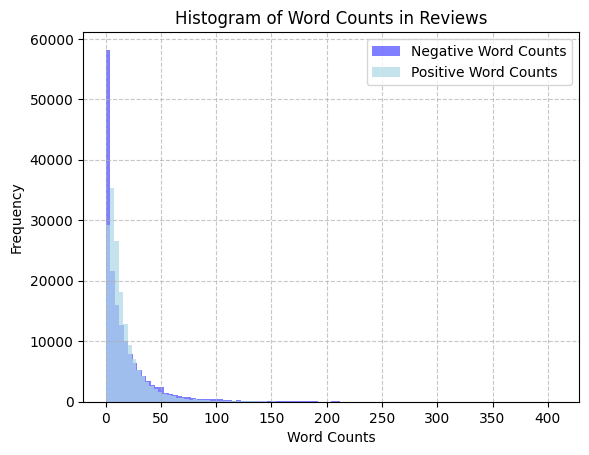

In [18]:
plt.hist(df['Review_Total_Negative_Word_Counts'],bins=100, alpha=0.5, color='blue', label='Negative Word Counts')
plt.hist(df['Review_Total_Positive_Word_Counts'], bins=100, alpha=0.7, color='lightblue', label='Positive Word Counts')

plt.xlabel('Word Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts in Reviews')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The histogram displays the frequency of word counts in reviews, categorized into negative and positive word counts with a right-skewed distribution. Most reviews contain a smaller number of words, with negative word counts slightly more prevalent in the lower range. The frequency of reviews decreases dramatically as the word count increases, with very few reviews exceeding 50 words in either category. This indicates that reviewers tend to express their opinions concisely, and extensive usage of either negative or positive words is uncommon.

In [24]:
columns_to_drop = ['Tags', 'days_since_review', 'lat', 'lng', 
                   'Hotel_Address', 'Additional_Number_of_Scoring', 
                   'Review_Date', 'Average_Score']

# Drop the columns from df_leisure
df = df.drop(columns=columns_to_drop)

In [25]:
df.isna().sum()

Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
travel_purpose                                0
dtype: int64

Since the study is not directly associated with lattitude and longtitude of each hotel, the null value will not impact the result. I choose not to drop the null value here.

In [13]:
# Define a function to extract "leisure trip" or "business trip" from the tag string
def extract_travel_purpose(tag_string):
    if "leisure trip" in tag_string.lower():
        return "leisure trip"
    elif "business trip" in tag_string.lower():
        return "business trip"
    else:
        return "other"  # or np.nan if you want to mark as missing values

# Apply this function to the 'Tags' column to create the new 'travel_purpose' column
df['travel_purpose'] = df['Tags'].apply(extract_travel_purpose)


### Text precessing - spaCy 

To process the review text, we use the spaCy library to perform an intricate analysis. This process commenced with the tokenization of text and segmentate the reviews into individual lexical elements or tokens. We also eliminated all punctuation and whitespace since these elements do not contribute substantively to the semantic content of the reviews. Furthermore, stop words were also excluded from the analysis due to their prevalent but non-informative nature.


Leveraging this refined tokenization process, we employed the Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer.TF-IDF stands as a statistical measure designed to evaluate the importance of a word within a document relative to a collection of hotel reviews. This measure is derived by multiplying two metrics: term frequency (TF) and inverse document frequency (IDF). Term frequency quantifies the number of times a word appears in a review, thereby indicating its immediate relevance. This dual consideration highlights words that are not only common in individual reviews but also distinct across the dataset, thereby providing a nuanced metric of a word's relevance and uniqueness. By transforming the reviews into structured DataFrames of TF-IDF scores, we effectively quantify the significance of each term, facilitating a focused analysis of linguistic patterns that define guest experiences. This streamlined approach enables a clearer understanding of what aspects of their stays are most impactful to guests, guiding insights into customer satisfaction and service improvement opportunities.

In [ ]:
nlp = spacy.load('en_core_web_sm', exclude=["parser", "ner"])

# Define the tokenizer function that integrates spaCy processing with scikit-learn
def spacy_tokenizer(doc):
    return [token.lemma_.lower() for token in nlp(doc) if not token.is_punct and not token.is_space and token.text.lower() not in STOP_WORDS]

def lemmatize_text(text):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(text)
    # Extract the lemma for each token and join
    return " ".join([token.lemma_ for token in doc])

df['Negative_Review'] = df['Negative_Review'].apply(lemmatize_text)
df['Positive_Review'] = df['Positive_Review'].apply(lemmatize_text)

#### Visualize the frequency distribution for positive/negative reviews

### Classify reviews into leisure or business travel categories

The `run_text_classification` function is designed to classify hotel reviews into leisure or business travel categories. It works by first dividing the input DataFrame into training and testing sets based on the reviews and their corresponding travel purposes. Using the TF-IDF Vectorizer, it converts text data into a numerical format that highlights key terms, while the Logistic Regression classifier within a pipeline structure learns to distinguish between the two travel purposes based on these terms. After training, the model's accuracy and performance are evaluated through a classification report, accuracy score, and a visualized confusion matrix. This concise approach combines natural language processing and machine learning to efficiently analyze and interpret the underlying patterns in hotel reviews, offering insights into different traveler preferences.

### Logistic regression model

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

def run_text_classification_logistic(df, review_column, ylabels, seed=123, vectorizer_params=None, classifier_params=None):
    """
    Function to perform text classification on a specified review column with logistic regression.
    
    Parameters:
    - df: DataFrame containing the reviews and labels.
    - review_column: The name of the column in df that contains the text to classify.
    - ylabels: Labels for the classification, e.g., travel purpose: leisure or business.
    - seed: Random seed for reproducibility.
    - vectorizer_params: Parameters for TfidfVectorizer.
    - classifier_params: Parameters for LogisticRegression.
    """
    
    if vectorizer_params is None:
        vectorizer_params = {'stop_words': 'english', 'min_df': 10}
    if classifier_params is None:
        classifier_params = {'C': 10, 'max_iter': 1000}
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[review_column], ylabels, test_size=0.2, random_state=seed)

    # Initialize TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(**vectorizer_params)
    
    # Initialize the Logistic Regression Classifier
    classifier = LogisticRegression(**classifier_params)
    
    # Creating the pipeline
    pipe = Pipeline([
        ('vectorizer', tfidf_vectorizer),
        ('classifier', classifier)
    ])
    
    # Training the model
    pipe.fit(X_train, y_train)
    
    # Evaluate with cross-validation
    cv_scores = cross_val_score(pipe, df[review_column], ylabels, cv=5)
    print(f"Average cross-validation accuracy: {cv_scores.mean()}")
    
    # Predicting the test data
    predicted = pipe.predict(X_test)
    predicted_proba = pipe.predict_proba(X_test)[:, 1]  # assuming binary classification: 0 or 1
    
    # Evaluation Metrics
    print(f"Classification Report for {review_column}:\n", classification_report(y_test, predicted))
    print(f"Logistic Regression Accuracy for {review_column}: {accuracy_score(y_test, predicted)}")
    print(f"AUC-ROC: {roc_auc_score(y_test, predicted_proba)}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predicted)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Business', 'Leisure'], yticklabels=['Business', 'Leisure'])
    plt.title(f'Confusion Matrix for {review_column}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    return pipe





### SVM

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV  # For probability estimates
import seaborn as sns
import matplotlib.pyplot as plt

def run_text_classification_svm(df, review_column, ylabels, seed=123, vectorizer_params=None, classifier_params=None):
    """
    Function to perform text classification on a specified review column with SVM.
    
    Parameters:
    - df: DataFrame containing the reviews and labels.
    - review_column: The name of the column in df that contains the text to classify.
    - ylabels: Labels for the classification, e.g., travel purpose: leisure or business.
    - seed: Random seed for reproducibility.
    - vectorizer_params: Parameters for TfidfVectorizer.
    - classifier_params: Parameters for LinearSVC.
    """
    
    if vectorizer_params is None:
        vectorizer_params = {'stop_words': 'english', 'min_df': 10, 'ngram_range': (1, 2)}
    if classifier_params is None:
        classifier_params = {'max_iter': 1000}
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[review_column], ylabels, test_size=0.2, random_state=seed)
    
    # Create a pipeline with TF-IDF Vectorizer and SVM Classifier
    pipe = Pipeline([
        ('vectorizer', TfidfVectorizer(**vectorizer_params)),
        ('classifier', LinearSVC(**classifier_params))
    ])
    
    # Parameters for GridSearchCV
    tuned_parameters = {'classifier__C': [0, 0.1, 1, 10, 100, 1000]}
    
    # Initialize GridSearchCV with the pipeline and the parameters
    clf = GridSearchCV(pipe, tuned_parameters, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    
    # Output the best parameters
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    
    # Use best estimator to predict on test data
    best_pipe = clf.best_estimator_
    
    # Predicting the test data
    predicted = best_pipe.predict(X_test)
    
    # Evaluation Metrics
    print(f"Classification Report for {review_column}:\n", classification_report(y_test, predicted))
    print(f"SVM Accuracy for {review_column}: {accuracy_score(y_test, predicted)}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predicted)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Business', 'Leisure'], yticklabels=['Business', 'Leisure'])
    plt.title(f'Confusion Matrix for {review_column}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    return best_pipe


Average cross-validation accuracy: 0.579799576745267
Classification Report for Negative_Review:
                precision    recall  f1-score   support

business trip       0.60      0.47      0.53     16496
 leisure trip       0.57      0.70      0.63     16680

     accuracy                           0.58     33176
    macro avg       0.59      0.58      0.58     33176
 weighted avg       0.59      0.58      0.58     33176

Logistic Regression Accuracy for Negative_Review: 0.5819266939956595
AUC-ROC: 0.6128110102848856


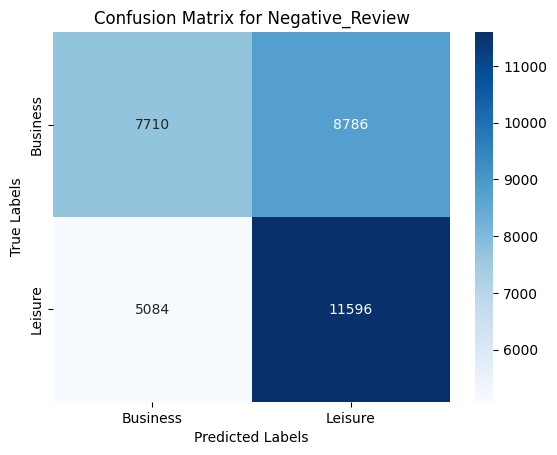

In [35]:
pipe_neg_logistic = run_text_classification_logistic(df, 'Negative_Review', df['travel_purpose'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.

Best parameters set found on development set:
{'classifier__C': 0.1}
Classification Report for Negative_Review:
                precision    recall  f1-score   support

business trip       0.61      0.47      0.53     16614
 leisure trip       0.57      0.69      0.62     16562

     accuracy                           0.58     33176
    macro avg       0.59      0.58      0.58     33176
 weighted avg       0.59      0.58      0.58     33176

SVM Accuracy for Negative_Review: 0.5823185435254401


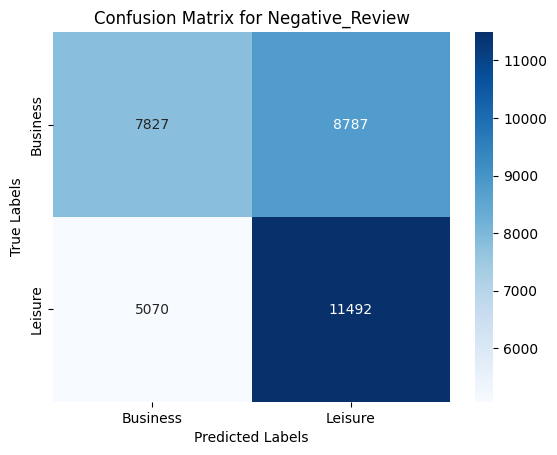

In [36]:
pipe_neg_svm = run_text_classification_svm(df, 'Negative_Review', df['travel_purpose'], seed=222)

The classification report and confusion matrix in the image reflect the performance of a logistic regression model when classifying negative hotel reviews into business or leisure trips.

From the classification report:
- Business trip reviews have a precision of 0.61, meaning that when the model predicts a review is about a business trip, it's correct 61% of the time. The recall for business trips is 0.47, indicating that the model identifies 47% of all actual business trip reviews correctly. Combined, these give an F1-score of 0.53, which is a weighted average of precision and recall.
- Leisure trip reviews have a slightly lower precision of 0.57, so out of all the leisure trip predictions made by the model, 57% are correct. However, the model has a better recall for leisure trips at 0.70, finding 70% of all actual leisure trip reviews. This results in a slightly higher F1-score of 0.63 compared to business trips.

The overall accuracy of the model is 0.59, meaning it correctly predicts whether a review is for a business or leisure trip 59% of the time across both categories.

The confusion matrix visualizes the actual versus predicted classifications:
- The model has predicted 16,496 reviews as business trips (true label 0), out of which it correctly identified 7,828 (true positives) and incorrectly identified 8,668 as leisure trips (false negatives).
- Out of 16,680 reviews predicted as leisure trips (true label 1), it correctly identified 11,607 (true positives) but incorrectly classified 5,073 as business trips (false positives).

The imbalance shown by the large number of false positives and negatives, especially in misclassifying business trips as leisure, suggests a bias in the model toward predicting leisure trips. This could be due to a variety of factors such as class imbalance or certain features in the dataset that are more strongly associated with leisure trips, causing the model to be less sensitive to patterns indicative of business trips.

Average cross-validation accuracy: 0.6154583436987615
Classification Report for Positive_Review:
                precision    recall  f1-score   support

business trip       0.60      0.66      0.63     16497
 leisure trip       0.63      0.57      0.60     16679

     accuracy                           0.61     33176
    macro avg       0.62      0.61      0.61     33176
 weighted avg       0.62      0.61      0.61     33176

Logistic Regression Accuracy for Positive_Review: 0.6141186399807089
AUC-ROC: 0.662625808929034


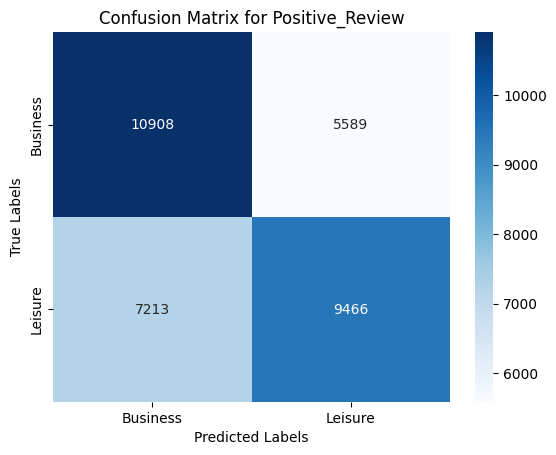

In [37]:
# Assuming df is your DataFrame, and it's already loaded and prepared
pipe_pos_logistic = run_text_classification_logistic(df, 'Positive_Review', df['travel_purpose'], seed=111)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.

Best parameters set found on development set:
{'classifier__C': 0.1}
Classification Report for Positive_Review:
                precision    recall  f1-score   support

business trip       0.61      0.65      0.63     16497
 leisure trip       0.63      0.58      0.60     16679

     accuracy                           0.62     33176
    macro avg       0.62      0.62      0.62     33176
 weighted avg       0.62      0.62      0.62     33176

SVM Accuracy for Positive_Review: 0.617283578490475


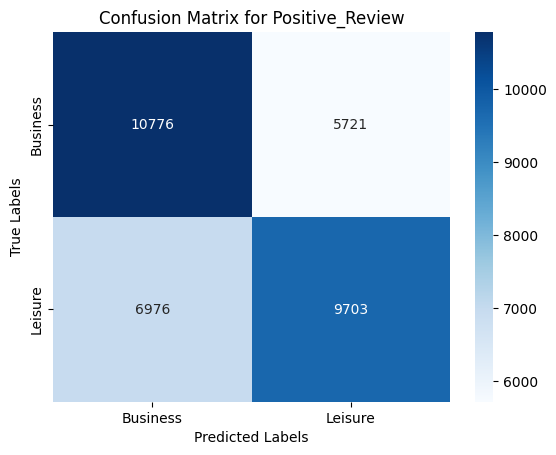

In [52]:
pipe_pos_svm = run_text_classification_svm(df, 'Positive_Review', df['travel_purpose'], seed=111)

The output for the logistic regression model and SVM model can be summarized as follows:
#### Logistic regression model

For positive reviews, the logistic regression accuracy is 0.6141
Business trips were correctly identified 60% of the time, and actual business trip reviews were retrieved 66% of the time.
Leisure trips were correctly identified 63% of the time, with a 57% retrieval rate for actual leisure reviews.

For negative reviews, the logistic regression accuracy is 0.5819.
Business trips were correctly identified 60% of the time, but only 47% of actual business trip reviews were retrieved.
Leisure trips showed a correct identification rate of 57%, with a better retrieval rate of 70% for actual leisure reviews.

#### SVM model
For positive reviews, the SVM model achieved an accuracy of 0.6173.
Business trips were correctly identified 61% of the time, with 65% of actual business trip reviews being retrieved. F1-score is 0.63, demonstrating the balance between precision and recall for this category. Leisure trips had a correct identification rate of 63%, with an actual retrieval rate of 58% for leisure reviews. The F1-score stands at 0.60, signaling a slightly less balanced performance than for business trip reviews.

For negative reviews, the SVM model demonstrated an accuracy of 0.5823. Business trip classifications were correct 61% of the time, while the actual retrieval rate for these reviews was 47%, as indicated by the recall. The F1-score for this category is 0.53, reflecting the balance between precision and recall. Leisure trip classifications had a precision of 57%, with a higher actual retrieval rate of 69%, suggested by the recall. The F1-score for leisure trips is 0.62, indicating a more balanced performance in this category compared to business trips.

#### Conclusion
The SVM and logistic regression models show similar performance levels in this study. While SVM excels at managing complex data structures, its advantages aren't significantly pronounced here. Logistic regression, known for its clarity and interpretability, is easier to manage, making it a preferable choice for the needs of the study. It offers a straightforward and transparent approach that aligns well with the goal of balancing performance with simplicity, facilitating ongoing model improvement, thus we chose logistic regression model for the following analysis.


### CANNOT RUN, BERT embedding with SVM

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.svm import SVC  # Using SVC as the classifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize tokenizer and BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def bert_encode(texts, tokenizer, max_len=512):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens = True,  # Add '[CLS]' and '[SEP]'
            max_length = max_len,       # Pad & truncate all sentences.
            padding = 'max_length',
            return_attention_mask = True,
            return_tensors = 'pt',      # Return PyTorch tensors.
        )
        
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    # Convert lists to tensors.
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

def get_bert_embeddings(input_ids, attention_masks, model):
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_masks)
    last_hidden_states = outputs.last_hidden_state
    # Use the mean of the last_hidden_states for sentence embedding
    embeddings = torch.mean(last_hidden_states, dim=1)
    return embeddings.numpy()

X = df['Negative_Review']  # The column with text to classify
y = df['travel_purpose'] 
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

# Tokenize and encode the text data
X_train_ids, X_train_masks = bert_encode(X_train, tokenizer, max_len=128)  # Reduced max_len
X_test_ids, X_test_masks = bert_encode(X_test, tokenizer, max_len=128)

# Get BERT embeddings, with tensors moved to CPU
X_train_embeddings = get_bert_embeddings(X_train_ids.cpu(), X_train_masks.cpu(), model)
X_test_embeddings = get_bert_embeddings(X_test_ids.cpu(), X_test_masks.cpu(), model)

# Machine Learning Pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='linear'))
svm_pipeline.fit(X_train_embeddings, y_train)

# Predictions and evaluation
predicted = svm_pipeline.predict(X_test_embeddings)
print(classification_report(y_test, predicted))

# No need to show confusion matrix here, just to keep the example concise


### Losgitic Regression model for Bianry analysis

The `analyze_coefficients` function conducts a binary analysis to discern the impact of words in classifying hotel reviews into categories for business and leisure travelers, using a logistic regression model. It pulls feature names from a TF-IDF vectorizer and their respective importance from the model's coefficients. In this context, a negative coefficient implies a word's strong association with business traveler reviews, whereas a positive coefficient signifies a word's relevance to leisure trip reviews. The function highlights the top 20 influential words for both categories by sorting these coefficients. The resulting DataFrame juxtaposes these words, clearly showcasing the linguistic elements that are most predictive for either business or leisure travelers as per the logistic regression model. This binary analysis method efficiently identifies key words that differentiate between the two traveler types in hotel reviews.

In [38]:
def analyze_coefficients(classifier, vectorizer):
    """
    Function to analyze and display the coefficients from a logistic regression classifier.
    
    Parameters:
    - classifier: The trained logistic regression classifier.
    - vectorizer: The TF-IDF vectorizer used to transform the text data.
    """
    # Extracting Coefficients
    feature_names = vectorizer.get_feature_names_out()
    coefficients = classifier.coef_.flatten()

    # Creating a DataFrame for easy analysis
    coef_df = pd.DataFrame({'feature_name': feature_names, 'coefficient': coefficients})
    
    # Sorting the DataFrame to get both ends of the coefficient spectrum
    lowest = coef_df.sort_values(by='coefficient').head(20).reset_index(drop=True)
    highest = coef_df.sort_values(by='coefficient', ascending=False).head(20).reset_index(drop=True)
    
    # Renaming columns for clarity when displayed side by side
    lowest.columns = ['feature_low', 'coefficient_low']
    highest.columns = ['feature_high', 'coefficient_high']
    
    # Combining the two DataFrames for a comparative display
    comparison = pd.concat([lowest, highest], axis=1)
    
    return comparison


In [39]:
classifier_neg = pipe_neg_logistic.named_steps['classifier']
vectorizer_neg = pipe_neg_logistic.named_steps['vectorizer']


In [40]:
# For Negative Reviews
classifier_neg = pipe_neg_logistic.named_steps['classifier']
vectorizer_neg = pipe_neg_logistic.named_steps['vectorizer']
top_bottom_coef_neg = analyze_coefficients(classifier_neg, vectorizer_neg)


# For Positive Reviews
classifier_pos = pipe_pos_logistic.named_steps['classifier']
vectorizer_pos = pipe_pos_logistic.named_steps['vectorizer']
top_bottom_coef_pos = analyze_coefficients(classifier_pos, vectorizer_pos)

### Result

In [41]:
top_bottom_coef_neg

,feature_low,coefficient_low,feature_high,coefficient_high
0,colleague,-8.978559,birthday,6.713345
1,meeting,-6.911084,honeymoon,5.829370
2,conference,-5.473432,mum,5.467017
3,invoice,-5.389940,dispute,5.151785
4,skype,-5.025681,nightcap,5.022142
5,business,-4.907852,anniversary,4.934885
6,consecutive,-4.886256,suited,4.478294
7,rai,-4.736114,marathon,4.404819
8,muesli,-4.649413,boarding,4.333879
9,interruption,-4.510169,disgusted,4.119475


Top 20 coefficients within negative reviews
The analysis of logistic regression coefficients from hotel reviews highlights words that correlate with negative and positive sentiments for business and leisure trips.

Terms like "colleague," "business," "meeting," and "conference" display the most negative coefficients, thereby being strongly indicative of business trip reviews. These keywords highlight common themes in negative reviews for business-related stays, potentially reflecting issues with work-related amenities or environments, such as inadequate meeting facilities or networking spaces. “consecutive” and “untrained” emphasize the high expectation of professionalism and efficiency from business travelers.  "Invoice" might point to concerns with billing or expense management — critical factors for business travelers who need to keep precise records for reimbursement. Another interesting word, "detergent", found in the list suggesting that the cleaning products used were either inadequate or too strong, resulting in an unpleasant stay. It could be a point of inconvenience for business travelers who value efficiency and convenience and may not always have the time to replace forgotten items during a busy trip (Hoang, 2014). ‘Interruption’ could refer to disruptions during the stay, such as noise, construction, or service disturbances that negatively affected the guest's comfort or ability to relax.

When it comes to leisure travelers, keywords such as "birthday" and "honeymoon," emerge with high coefficients, suggesting that when issues arise during these significant personal events, they are keenly felt and impact guest satisfaction substantially. The presence of terms like "dispute" and "disgusted" underscores instances of profound dissatisfaction, perhaps where services or facilities drastically underperformed against the anticipated celebratory backdrop.

Further analysis uncovers logistical and structural grievances—terms like "downfall," "congestion," and "lounger" signal that guests faced challenges with the hotel’s physical capacity or amenities, detracting from the leisure and relaxation sought. Service-related issues are also evident; "blunt" may denote perceived rudeness or lack of warmth in guest interactions, significantly affecting the overall experience.

The term "retrieve" touches upon the functional aspects of guest services, potentially pointing to the frustrations associated with retrieving lost items, a detail that can overshadow an otherwise pleasant stay. "Rambla," possibly referring to the famous street in Barcelona or a similar popular location, indicates unmet location-specific expectations, a factor critical to leisure travelers seeking enriching local experiences.

Overall, while leisure travelers look for pleasure and relaxation, these negative coefficients reflect key areas where their experience was lacking, signaling opportunities for hotels to improve service and facilities for leisure stays. Different from business travelers that companies will cover their hotel stay, most of the leisure travelers have to pay the hotel expenses from their own pocket, which might lead to a higher expectation on the overall experiences and amenities of a hotel (JTB Business Travel, 

In [42]:
top_bottom_coef_pos

,feature_low,coefficient_low,feature_high,coefficient_high
0,conference,-11.117376,anniversary,6.893715
1,meeting,-8.673283,honeymoon,5.597575
2,business,-8.310937,cruise,5.353594
3,colleague,-6.017464,birthday,5.156835
4,congress,-5.857522,concert,5.026699
5,university,-5.795583,girlfriend,5.026106
6,exhibition,-5.782758,marathon,4.853697
7,fiera,-4.994848,strawberry,4.829030
8,ccib,-4.888866,apollo,4.805080
9,preparation,-4.620549,daughter,4.656189


The analysis of the top coefficient words from positive reviews distinguishes between terms associated with business and leisure travel.

For business travelers, terms with the most negative coefficients such as "conference," "meeting," and "business" underscore the professional nature of their stays. Notable mentions of "university" and "seminar" likely reflect accommodations for academic or professional development purposes. The presence of words like "colleague," "corporate," and "convention" suggests that networking and corporate events significantly influence positive reviews among this group. The term "iron" intriguingly points towards practical needs, emphasizing the importance of amenities that facilitate a professional appearance.

In leisure travel, positive hotel reviews highlight experiences tied to significant life events and personal relationships. Terms like "anniversary," "honeymoon," and "birthday" suggest a celebration of milestones, while "concert," "cruise," and "marathon" indicate the importance of entertainment and activity-based attractions. Words such as "girlfriend," "daughter," and "wedding" emphasize the intimate, relational aspects of travel. 

Additionally, references to specific experiences or venues, hinted at by terms like "youtube" and "O2" as O2 Arena in London, UK show a trend towards shareable, location-based leisure activities. Interestingly, the word 'strawberry' was marked as the 7th highest frequency word. It is unusual for a specific fruit to feature prominently in hotel reviews, which suggests a few possibilities: a special dish, a seasonal festival, a gift amenity (like chocolate covered strawberry) or an iconic hotel feature—that resonates well with guests. This unexpected highlight could represent a distinctive offering or experience provided by the hotel, which may play a part in crafting memorable stays. Collectively, these terms underscore the role of hotels in enriching personal celebrations and leisure experiences.
This analysis demonstrates how even within positive reviews, the content can reflect different priorities: business travelers mention positive experiences related to the purpose and convenience of their trip, while leisure travelers focus on the enjoyable and recreational attributes of their stay.


### Conclusion 
With TF-IDF analysis, this study set out to understand if leisure and business travelers look for different prioirities in their hotel stays by analyzing their reviews. The analysis of the top coefficients provides compelling evidence that each group places importance on different aspects of their hotel stays. For business travelers, it emphasize the preference on functional aspects that support the purpose of their trip, such as facilities for work and meetings. Conversely, terms with high positive coefficients in reviews, aligned with leisure travel, such as "concert," " honeymoon," and "sightseeing" paint a picture of leisure travelers' experiences. These travelers value elements of enjoyment, accessibility, and amenities that enhance their stay.  

In conclusion, the TF-IDF analysis support the hypothesis that leisure and business travelers indeed focus on different aspects of their hotel experiences. These insights affirm the necessity for a nuanced approach to customer service within the hospitality industry—where understanding and addressing the specific expectations of each traveler segment can significantly enhance guest satisfaction and loyalty.

### Limitation and Future Study

This study utilizes TF-IDF analysis to elucidate the preferences of business and leisure travelers in hotel reviews within the European context. A limitation arises from this regional focus, which may not reflect global traveler behaviors, thus constraining the universality of our results. The decision to equalize the number of reviews for business and leisure trips by downsizing the dataset could also diminish the robustness of our findings, potentially omitting vital insights due to the exclusion of data. Such a reduction may not only limit the model's generalizability but also increase susceptibility to overfitting, risking the loss of critical subtleties within the larger, original dataset.

Furthermore, the pre-pandemic timing of the data collection does not account for the profound changes in travel preferences brought about by COVID-19, which could influence current and future traveler behaviors.

Future research should aim to extend the analytical framework beyond the European market and pre-pandemic patterns to achieve more widely applicable insights. Incorporating a diverse set of variables—like booking behaviors, stay duration, guest nationalities, occupational information, and seasonal timing of reviews—could enrich the analysis. Utilizing metadata, such as the interval between booking and check-in or user-generated tags, may also refine the predictive accuracy of the models employed.

To enhance model performance, subsequent research could undertake more extensive fine-tuning and consider advanced models like BERT embeddings. However, this investigation was constrained by computational resources, precluding the implementation of such computationally intensive methods. Future studies equipped with the requisite capabilities should explore these avenues to develop a more nuanced understanding of traveler classifications.


### Reference
Ashill, N. J., Rod, M., & Carruthers, J. (2008). The effect of management commitment to service quality on frontline employees’ job attitudes, turnover intentions and service recovery performance in a new public management context. Journal of Strategic Marketing, 16(5), 437–462. https://doi.org/10.1080/09652540802480944 
Aufreiter, N. A., Elzinga, D., & Gordon, J. W. (2003, November 1). Better branding. McKinsey & Company. https://www.mckinsey.com/capabilities/growth-marketing-and-sales/our-insights/better-branding 
Babakus, E., & Yavas, U. (2003). The Effect of Management Commitment to Service Quality on Employees’ Affective and Performance Outcomes. https://www.researchgate.net/publication/246926624_The_Effect_of_Management_Commitment_to_Service_Quality_on_Employees’_Affective_and_Performance_Outcomes 
Chu, R. K. S., & Choi, T. (2000). An importance-performance analysis of hotel selection factors in the Hong Kong hotel industry: A comparison of business and leisure travellers. Tourism Management, 21(4), 363-377. https://doi.org/10.1016/S0261-5177(99)00070-9
H., G. N., Siautama, R., I. A., A. C., & Suhartono, D. (2021). Extractive Hotel Review summarization based on tf/IDF and adjective-noun pairing by considering annual sentiment trends. Procedia Computer Science, 179, 558–565. https://doi.org/10.1016/j.procs.2021.01.040 
Huang, A. (2014). Understanding the differences between business vs. leisure travelers. E-Marketing Associates. Retrieved April 4, 2024, from https://www.e-marketingassociates.com/blog/understanding-differences-business-vs-leisure-travelers

Jiashen Liu, “515k Hotel Reviews Data in
Europe,” Kaggle, accessed [Date], https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe.

Jurowski, C., & Reich, A. Z. (2000). An Explanation and Illustration of Cluster Analysis for Identifying Hospitality Market Segments, 24(1). https://doi.org/10.1177/1096348000024001 
JTB Business Travel. (n.d.). Business vs. leisure travel: Key differences and considerations. Retrieved April 4, 2024, from https://www.jtbbusinesstravel.com/business-vs-leisure-travel/
Kashyap, R., & Bojanic, D. C. (2000). A structural analysis of value, quality, and price perceptions of business and leisure travelers. Journal of Travel Research, 39(1), 45–51. https://doi.org/10.1177/004728750003900106 
Leeuwen, R. V., Koole, G., & b. (2022, September 13). Data-driven market segmentation in hospitality using unsupervised machine learning. https://www.sciencedirect.com/science/article/pii/S2666827022000895 
Litvin, S. W. (2000, October). Revisiting the heavy-user segment for vacation travel marketing. https://doi.org/10.1177/13567667000060040 
Mandhachitara, R., & Gulid, N. (2019). Stretching the performance quality-value-behavioural consequences chain: An empirical study of business and leisure segments in upscale hotels in Thailand. International Journal of Leisure and Tourism Marketing, 6(3/4), 279. https://doi.org/10.1504/ijltm.2019.103565
Skogland, I., & Siguaw, J. A. (2004). Are your satisfied customers loyal? Cornell Hotel and Restaurant Administration Quarterly, 45(3), 221–234. https://doi.org/10.1177/0010880404265231 
STR. (n.d.). How to Use the STAR report. https://str.com/sites/default/files/2019-07/how-to-read-star-report.pdf. https://str.com/sites/default/files/2019-07/how-to-read-star-report.pdf 
Turner, M. J. (2013). Hotel Management Contracts: A particularly rich research context. Journal of Hotel &amp; Business Management, 03(01). https://doi.org/10.4172/2169-0286.1000e107 





